<a href="https://colab.research.google.com/github/phantom-balance/TEP/blob/master/performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/phantom-balance/TEP.git
%cd TEP

Cloning into 'TEP'...
remote: Enumerating objects: 420, done.
remote: Counting objects: 100% (420/420), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 420 (delta 180), reused 318 (delta 101), pack-reused 0
Receiving objects: 100% (420/420), 70.77 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (180/180), done.
Checking out files: 100% (125/125), done.
/content/TEP


In [ ]:
!python NN.py

In [ ]:
import NN
y_true, y_pred, y_prob = NN.summary_return(DATA="train")

In [ ]:
import numpy as np
import torch
y_true_ = torch.tensor(y_true)
y_true_ = y_true_.cpu()
y_pred_ = torch.tensor(y_pred)
y_pred_ = y_pred_.cpu()
y_prob_ = y_prob.cpu()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[  7   3   1   0   9  28   1  52  32   4   0  37  75  48 113   2   0  18
    8  18  42   2]
 [  1 470   0   0   0   0   0   1   0   0   0   3   0   4   1   0   0   0
    0   0   0   0]
 [  0   0 463   0   0   0   0   2   0   0   0   3   1   5   5   0   0   0
    1   0   0   0]
 [  3   0   1   1   4  26   0  61  39   1   0  23  73  56  95   0   0  36
    7  15  38   1]
 [  0   0   0   0 331   5   4  10  57   6   0   4   3  34  16   0   0   1
    1   1   7   0]
 [  5   2   0   1   1  50   0  34  40   3   0  24 136  46  47   2   0  21
   24  10  32   2]
 [  0   0   0   0   0   0 476   0   0   0   0   0   1   0   1   0   0   0
    2   0   0   0]
 [  0   0   0   0   0   0   0 473   3   0   0   0   3   0   1   0   0   0
    0   0   0   0]
 [  1  43   1   0   1   1  27   3 277   1   0   5  42  55  10   0   0   1
    6   1   4   1]
 [  4   3   0   0   2  18   2  46  43   3   0  21  77  85  81   5   1  18
   13  14  42   2]
 [  3  21   2   1   3  13   2  47  30   5   1  13  85 155  31   4   0 

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix


cf_matrix = multilabel_confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[[10032    48]
  [  493     7]]

 [[ 9986   114]
  [   10   470]]

 [[10081    19]
  [   17   463]]

 [[10095     5]
  [  479     1]]

 [[ 9881   219]
  [  149   331]]

 [[ 9895   205]
  [  430    50]]

 [[10041    59]
  [    4   476]]

 [[ 9567   533]
  [    7   473]]

 [[ 9585   515]
  [  203   277]]

 [[10056    44]
  [  477     3]]

 [[10097     3]
  [  479     1]]

 [[ 9821   279]
  [  456    24]]

 [[ 9197   903]
  [  282   198]]

 [[ 8928  1172]
  [  113   367]]

 [[ 9007  1093]
  [  249   231]]

 [[10080    20]
  [  477     3]]

 [[10098     2]
  [  477     3]]

 [[ 9830   270]
  [  134   346]]

 [[ 9906   194]
  [  121   359]]

 [[10000   100]
  [  458    22]]

 [[ 9714   386]
  [  209   271]]

 [[10083    17]
  [  476     4]]]


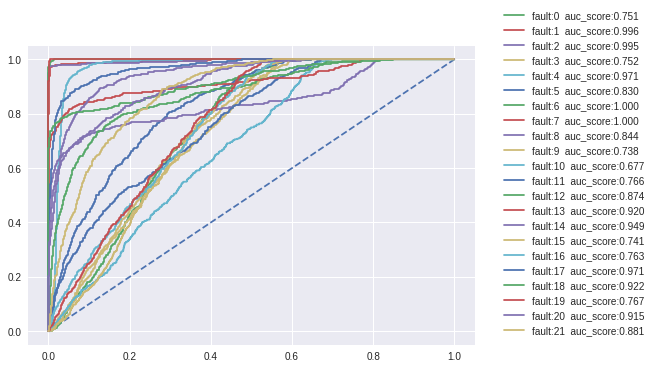

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

plt.style.use('seaborn')
plt.plot([0,1], [0,1], '--')

y_true_ = y_true_.tolist()
y_pred_ = y_pred_.tolist()
#Binary mode for each class
for i in range(22):
  y_true_temp=y_true_.copy()
  y_pred_temp=y_pred_.copy()
  for j in range(len(y_true)):
    if y_true_temp[j]==i:
      y_true_temp[j]= torch.tensor(1)
    else:
      y_true_temp[j]=torch.tensor(0)
    if y_pred_temp[j]==i:
      y_pred_temp[j] = torch.tensor(1)
    else:
      y_pred_temp[j]=torch.tensor(0)
    

  fpr, tpr, thresholds = roc_curve(y_true_temp, y_prob_[:,i])
  roc_auc = roc_auc_score(y_true_temp, y_prob_[:,i])
  plt.plot(fpr, tpr, label="fault:"+str(i)+"  auc_score:"+str(f'{float(roc_auc):.3f}'))
  # print("precision_score_for_number"+str(i)+":"+str(precision_score(y_true_temp, y_pred_temp)))
  # print("recall_score_for_number"+str(i)+":"+str(recall_score(y_true_temp, y_pred_temp)))
  # print("f1_score_for_number"+str(i)+":"+str(f1_score(y_true_temp, y_pred_temp)))
  # print("###########################################################")
plt.legend(bbox_to_anchor=(1.4,0), loc='lower right')

In [ ]:
!python RNN.py

In [ ]:
import RNN
y_true, y_pred, y_prob = RNN.summary_return(DATA="train")

In [ ]:
import numpy as np
import torch
y_true_ = torch.tensor(y_true)
y_true_ = y_true_.cpu()
y_pred_ = torch.tensor(y_pred)
y_pred_ = y_pred_.cpu()
y_prob_ = y_prob.cpu()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[ 86   0   0  10   0  41   0   1   0  16  20   0   0   0   0  42 110   0
    0  45  29  96]
 [  0 455   0   0   0   1   0   0   0   1   1   0   0  15   0   0   0   0
    0   0   3   0]
 [  0   0 466   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0
    0   1   0   7]
 [ 31   0   0  29   0  41   0   0  10  16  21   0   0   0   0  47 144   0
    0  41  25  71]
 [  0   0   0   0 476   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 25   6   1   2   0 285   0   0  19   1  20   0   2  34   0   0  29   0
    0  13   2  37]
 [  0   0   0   0   0   0 471   0   0   0   0   0   0   0   0   0   0   0
    0   0   5   0]
 [  0   0   0   0   0   0   0 476   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  4  31  16   3   5  51   0   0 250   0  15   0   0  32   0   2   3  14
    0   3  32  15]
 [ 34   0   0   6   0  28   0   0   2  37  62   0   0   0   0  56  73   0
    0  25  50 103]
 [ 19   3   0  15   0  45   1   0   5   2 144   2   1  18   0  17  76 

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix


cf_matrix = multilabel_confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[[ 9681   315]
  [  410    86]]

 [[ 9954    62]
  [   21   455]]

 [[ 9990    26]
  [   10   466]]

 [[ 9892   124]
  [  447    29]]

 [[ 9845   171]
  [    0   476]]

 [[ 9482   534]
  [  191   285]]

 [[10013     3]
  [    5   471]]

 [[10004    12]
  [    0   476]]

 [[ 9864   152]
  [  226   250]]

 [[ 9891   125]
  [  439    37]]

 [[ 9543   473]
  [  332   144]]

 [[10000    16]
  [  476     0]]

 [[10003    13]
  [  468     8]]

 [[ 9782   234]
  [   69   407]]

 [[10014     2]
  [  340   136]]

 [[ 9694   322]
  [  398    78]]

 [[ 9272   744]
  [  337   139]]

 [[ 9987    29]
  [   42   434]]

 [[ 9943    73]
  [  117   359]]

 [[ 9762   254]
  [  425    51]]

 [[ 9681   335]
  [   87   389]]

 [[ 9028   988]
  [  167   309]]]


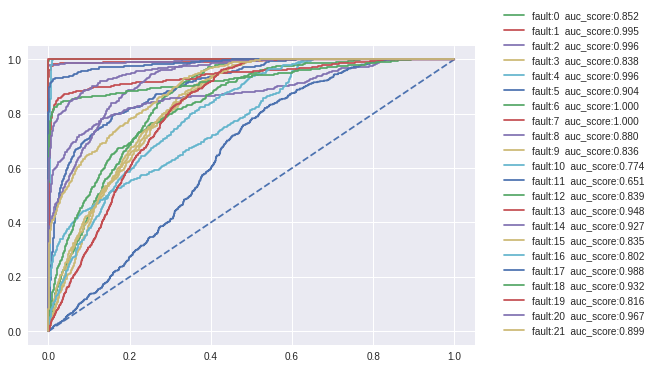

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

plt.style.use('seaborn')
plt.plot([0,1], [0,1], '--')

y_true_ = y_true_.tolist()
y_pred_ = y_pred_.tolist()
#Binary mode for each class
for i in range(22):
  y_true_temp=y_true_.copy()
  y_pred_temp=y_pred_.copy()
  for j in range(len(y_true)):
    if y_true_temp[j]==i:
      y_true_temp[j]= torch.tensor(1)
    else:
      y_true_temp[j]=torch.tensor(0)
    if y_pred_temp[j]==i:
      y_pred_temp[j] = torch.tensor(1)
    else:
      y_pred_temp[j]=torch.tensor(0)
    

  fpr, tpr, thresholds = roc_curve(y_true_temp, y_prob_[:,i])
  roc_auc = roc_auc_score(y_true_temp, y_prob_[:,i])
  plt.plot(fpr, tpr, label="fault:"+str(i)+"  auc_score:"+str(f'{float(roc_auc):.3f}'))
  # print("precision_score_for_number"+str(i)+":"+str(precision_score(y_true_temp, y_pred_temp)))
  # print("recall_score_for_number"+str(i)+":"+str(recall_score(y_true_temp, y_pred_temp)))
  # print("f1_score_for_number"+str(i)+":"+str(f1_score(y_true_temp, y_pred_temp)))
  # print("###########################################################")
plt.legend(bbox_to_anchor=(1.4,0), loc='lower right')

In [ ]:
!python LSTM.py

In [ ]:
import LSTM
y_true, y_pred, y_prob = LSTM.summary_return(DATA="train")

In [ ]:
import numpy as np
import torch
y_true_ = torch.tensor(y_true)
y_true_ = y_true_.cpu()
y_pred_ = torch.tensor(y_pred)
y_pred_ = y_pred_.cpu()
y_prob_ = y_prob.cpu()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[  0   3   0   6  19   3   0   0   0  37   2   7   0   0   0  43 181   0
    0 186   9   0]
 [  0 460   0   0   0   0   0   1   6   0   0   0   0   2   0   0   5   0
    2   0   0   0]
 [  0   0 465   0   0   0   0   0   0   0   0   0   0   0   0   0   7   0
    0   0   0   4]
 [  1   0   0  14  17   2   0   2   0  39   4  17   0   0   1  66 142   0
    0 144  26   1]
 [  0   0   0   0 476   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  33   2  26   0  42  16   4   2   2  64  42   0  13  87   1
   12 105  23   2]
 [  0   0   0   0   0   0 466   0   0   0   2   0   0   2   0   0   6   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 454   0   0   0   0   9   0   0   0   0   0
   13   0   0   0]
 [  0  82   0   0   0   5   0   7 232   0   1   0  74  16   0   3  11   0
    0   3  38   4]
 [  0   0   0   3  10   0   0   0   2  76  13   1   0   0   0  69 206   0
    0  74   5  17]
 [  0   0   0   9   1  17   0   7   2  14 106   8  35  73   0   6 129 

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix


cf_matrix = multilabel_confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[[ 9995     1]
  [  496     0]]

 [[ 9929    87]
  [   16   460]]

 [[10016     0]
  [   11   465]]

 [[ 9898   118]
  [  462    14]]

 [[ 9761   255]
  [    0   476]]

 [[ 9966    50]
  [  450    26]]

 [[10016     0]
  [   10   466]]

 [[ 9754   262]
  [   22   454]]

 [[ 9974    42]
  [  244   232]]

 [[ 9808   208]
  [  400    76]]

 [[ 9926    90]
  [  370   106]]

 [[ 9946    70]
  [  401    75]]

 [[ 9779   237]
  [  273   203]]

 [[ 9704   312]
  [  110   366]]

 [[ 9895   121]
  [    0   476]]

 [[ 9669   347]
  [  371   105]]

 [[ 8774  1242]
  [  235   241]]

 [[10004    12]
  [   51   425]]

 [[ 9966    50]
  [  163   313]]

 [[ 9009  1007]
  [  298   178]]

 [[ 9820   196]
  [  132   344]]

 [[ 9930    86]
  [  278   198]]]


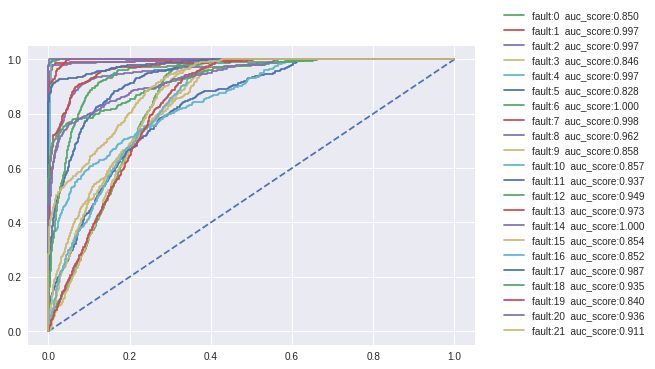

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

plt.style.use('seaborn')
plt.plot([0,1], [0,1], '--')

y_true_ = y_true_.tolist()
y_pred_ = y_pred_.tolist()
#Binary mode for each class
for i in range(22):
  y_true_temp=y_true_.copy()
  y_pred_temp=y_pred_.copy()
  for j in range(len(y_true)):
    if y_true_temp[j]==i:
      y_true_temp[j]= torch.tensor(1)
    else:
      y_true_temp[j]=torch.tensor(0)
    if y_pred_temp[j]==i:
      y_pred_temp[j] = torch.tensor(1)
    else:
      y_pred_temp[j]=torch.tensor(0)
    

  fpr, tpr, thresholds = roc_curve(y_true_temp, y_prob_[:,i])
  roc_auc = roc_auc_score(y_true_temp, y_prob_[:,i])
  plt.plot(fpr, tpr, label="fault:"+str(i)+"  auc_score:"+str(f'{float(roc_auc):.3f}'))
  # print("precision_score_for_number"+str(i)+":"+str(precision_score(y_true_temp, y_pred_temp)))
  # print("recall_score_for_number"+str(i)+":"+str(recall_score(y_true_temp, y_pred_temp)))
  # print("f1_score_for_number"+str(i)+":"+str(f1_score(y_true_temp, y_pred_temp)))
  # print("###########################################################")
plt.legend(bbox_to_anchor=(1.4,0), loc='lower right')

In [ ]:
!python GRU.py

In [ ]:
import GRU
y_true, y_pred, y_prob = GRU.summary_return(DATA="train")

In [ ]:
import numpy as np
import torch
y_true_ = torch.tensor(y_true)
y_true_ = y_true_.cpu()
y_pred_ = torch.tensor(y_pred)
y_pred_ = y_pred_.cpu()
y_prob_ = y_prob.cpu()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[ 90   0   0  24   0   0   0   2   0  34  13   0   0   0   2   0   0  14
    0 118  24 175]
 [  0 463   0   0   0   0   4   0   0   4   0   0   0   4   0   0   0   0
    0   0   0   1]
 [  0   0 465   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  11]
 [ 44   0   0  40   0   2   0   4   0  65   3   0   0   1   0   0   0  42
    0 124  17 134]
 [  0   0   0   0 476   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 27   0   0  28   3 149   2   9  76  22   0   0  15  65   0   0   0   8
    4  35  31   2]
 [  0   0   0   0   0   0 476   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 476   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  3  82   0   0   0   0   1   1 352   0   0   0   0  11   0   0   0   5
   12   5   0   4]
 [ 43   0   0  18   0   3   0   0   0  92  31   0   1   7   1   0   0   1
    0  91  33 155]
 [ 37   0   0  14   5  13   0  23  11  10  76   3   1 133   1   0   0 

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix


cf_matrix = multilabel_confusion_matrix(y_true_, y_pred_)
print(cf_matrix)

[[[ 9650   346]
  [  406    90]]

 [[ 9931    85]
  [   13   463]]

 [[10015     1]
  [   11   465]]

 [[ 9864   152]
  [  436    40]]

 [[ 9867   149]
  [    0   476]]

 [[ 9989    27]
  [  327   149]]

 [[10007     9]
  [    0   476]]

 [[ 9934    82]
  [    0   476]]

 [[ 9698   318]
  [  124   352]]

 [[ 9713   303]
  [  384    92]]

 [[ 9940    76]
  [  400    76]]

 [[10013     3]
  [  474     2]]

 [[ 9981    35]
  [  391    85]]

 [[ 9586   430]
  [   57   419]]

 [[ 9941    75]
  [    0   476]]

 [[10016     0]
  [  476     0]]

 [[10016     0]
  [  476     0]]

 [[ 9851   165]
  [   17   459]]

 [[ 9985    31]
  [  197   279]]

 [[ 9279   737]
  [  348   128]]

 [[ 9754   262]
  [   85   391]]

 [[ 8595  1421]
  [   85   391]]]


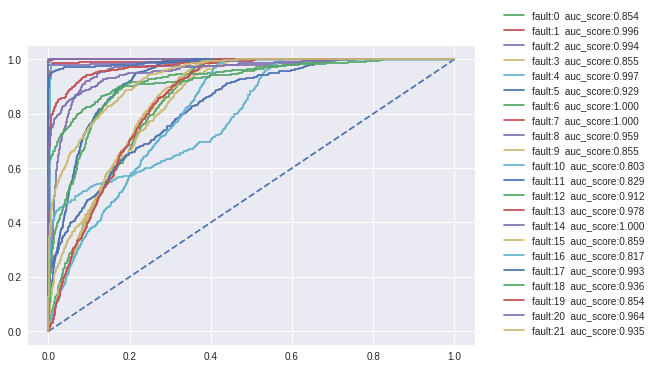

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

plt.style.use('seaborn')
plt.plot([0,1], [0,1], '--')

y_true_ = y_true_.tolist()
y_pred_ = y_pred_.tolist()
#Binary mode for each class
for i in range(22):
  y_true_temp=y_true_.copy()
  y_pred_temp=y_pred_.copy()
  for j in range(len(y_true)):
    if y_true_temp[j]==i:
      y_true_temp[j]= torch.tensor(1)
    else:
      y_true_temp[j]=torch.tensor(0)
    if y_pred_temp[j]==i:
      y_pred_temp[j] = torch.tensor(1)
    else:
      y_pred_temp[j]=torch.tensor(0)
    

  fpr, tpr, thresholds = roc_curve(y_true_temp, y_prob_[:,i])
  roc_auc = roc_auc_score(y_true_temp, y_prob_[:,i])
  plt.plot(fpr, tpr, label="fault:"+str(i)+"  auc_score:"+str(f'{float(roc_auc):.3f}'))
  # print("precision_score_for_number"+str(i)+":"+str(precision_score(y_true_temp, y_pred_temp)))
  # print("recall_score_for_number"+str(i)+":"+str(recall_score(y_true_temp, y_pred_temp)))
  # print("f1_score_for_number"+str(i)+":"+str(f1_score(y_true_temp, y_pred_temp)))
  # print("###########################################################")
plt.legend(bbox_to_anchor=(1.4,0), loc='lower right')

In [ ]:
from google.colab import files
files.download('GRU_TEP.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>